

## **Asssignment1-PART-A -Skip-gram Model for Word2Vec**



In [1]:
import nltk
nltk.download('punkt')
nltk.download('gutenberg')
from nltk.corpus import gutenberg
austen = gutenberg.sents('austen-sense.txt') + gutenberg.sents('austen-emma.txt') + gutenberg.sents('austen-persuasion.txt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


**Sanity check:**

In [2]:
print(len(austen))

16498


In [3]:
austen[0]

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']']

### **2. Preprocessing the Training Corpus**

In [4]:
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
Stop_words = set(stopwords.words('english')) 
#preprocessing the corpus
def preprocess_corpus(corpus):
    sent_corpus = []
    for word in corpus:
      processed_word = [] 
      for w in word:
        if len(w.strip()) == 0:
          continue 
        if w.isalpha():
          if w not in Stop_words:
            processed_word.append(w.lower()) 
      sent_corpus.append(processed_word)
    processed_corpus = [word for word in sent_corpus if len(word)>3]
    return processed_corpus
    
normalized_corpus = preprocess_corpus(austen)
print('The new length of the preprocessed output',len(normalized_corpus))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The new length of the preprocessed output 13651


**Sanity check:**

In [5]:
sample = austen[:2] + austen[100:102]
preprocessed_sample = preprocess_corpus(sample)
print(len(sample), sample)
print()
print(len(preprocessed_sample), preprocessed_sample)

4 [['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'], ['CHAPTER', '1'], ['But', ',', 'then', ',', 'if', 'Mrs', '.', 'Dashwood', 'should', 'live', 'fifteen', 'years', 'we', 'shall', 'be', 'completely', 'taken', 'in', '."'], ['"', 'Fifteen', 'years', '!']]

2 [['sense', 'sensibility', 'jane', 'austen'], ['but', 'mrs', 'dashwood', 'live', 'fifteen', 'years', 'shall', 'completely', 'taken']]


### **3. Creating the Corpus Vocabulary and Preparing the Data**



In [6]:
word2idx = {}
idx2word = {}
sents_as_ids={}

#creating word2idx which is a lookup table and idx2word and combining them
def prepareData(normalized_corpus):
  dic = []
  for word in normalized_corpus:
    for s in word:
      dic.append(s)
  dic = list(set(dic))
  for s in range(len(dic)):
      word2idx[dic[s]] = s
      idx2word[s] = dic[s] 
  return word2idx,idx2word
word2idx,idx2word = prepareData(normalized_corpus)

#sent_as_ids is represented by a unique integer and each sentence an array of integers
def prepareSentsAsId(normalized_corpus):
    sent_ids = []
    sent_norm = []
    for word in normalized_corpus:
      for v in word:
        sent_norm.append(word2idx[v])
      sent_ids.append(sent_norm)
    return sent_ids
sents_as_ids = prepareSentsAsId(normalized_corpus)

**Sanity Check**



In [7]:
print('Number of unique words:', len(word2idx))
print('\nSample word2idx: ', list(word2idx.items())[:10])
print('\nSample idx2word:', list(idx2word.items())[:10])
print('\nSample sents_as_id:', prepareSentsAsId(preprocessed_sample))

Number of unique words: 10180

Sample word2idx:  [('inference', 0), ('outweigh', 1), ('tray', 2), ('employments', 3), ('dove', 4), ('smartened', 5), ('subsist', 6), ('warmed', 7), ('periods', 8), ('recommend', 9)]

Sample idx2word: [(0, 'inference'), (1, 'outweigh'), (2, 'tray'), (3, 'employments'), (4, 'dove'), (5, 'smartened'), (6, 'subsist'), (7, 'warmed'), (8, 'periods'), (9, 'recommend')]

Sample sents_as_id: [[7604, 8074, 5802, 379], [8486, 802, 7130, 1523, 2306, 4697, 1974, 3889, 5609]]


In [8]:
VOCAB_SIZE = len(word2idx) 
EMBED_SIZE = 100 # We are creating 100D embeddings.

In [9]:
print('Number of unique words:', len(word2idx))

Number of unique words: 10180


### **4. Generating training instances**

In [10]:
from keras.preprocessing.sequence import skipgrams
#generate train data using corpus and skipgram
skip_grams = [skipgrams(v, vocabulary_size=VOCAB_SIZE, window_size=5) for v in sents_as_ids]

**Sanity Check**

In [11]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]

for i in range(len(pairs)):
         	print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        	# the first word and its index
        	idx2word[pairs[i][0]], pairs[i][0],
        	# the second word and its index
        	idx2word[pairs[i][1]], pairs[i][1],
        	# the label
        	labels[i]))

(austen (379), sense (7604)) -> 1
(jane (5802), sensibility (8074)) -> 1
(sensibility (8074), austen (379)) -> 1
(sense (7604), austen (379)) -> 1
(austen (379), privations (120)) -> 0
(austen (379), horses (7099)) -> 0
(sense (7604), wisest (5181)) -> 0
(austen (379), gallop (690)) -> 0
(austen (379), jane (5802)) -> 1
(sense (7604), jane (5802)) -> 1
(sensibility (8074), fragments (7557)) -> 0
(jane (5802), complains (6117)) -> 0
(sensibility (8074), compass (4574)) -> 0
(jane (5802), goose (7024)) -> 0
(sensibility (8074), sense (7604)) -> 1
(sense (7604), begun (705)) -> 0
(austen (379), sensibility (8074)) -> 1
(jane (5802), distrust (9943)) -> 0
(sensibility (8074), jane (5802)) -> 1
(sense (7604), sensibility (8074)) -> 1
(sense (7604), misconceived (9494)) -> 0
(jane (5802), austen (379)) -> 1
(sensibility (8074), alighted (3227)) -> 0
(jane (5802), sense (7604)) -> 1


### **5. Building the Skip-gram Neural Network Architecture**


In [12]:
from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import plot_model



####**A. The first step is to initialize and transform the first input using the following lines of code:**

In [13]:
# The input is an array of target indices e.g. [2, 45, 7, 23,...9]
target_word = Input((1,), dtype='int32')


# feed the words into the model using the Keras <Embedding> layer. This is the hidden layer 
# from whose weights we will get the word embeddings.
target_embedding = Embedding(VOCAB_SIZE, EMBED_SIZE, name='target_embed_layer',
                        	embeddings_initializer='glorot_uniform',
                         	input_length=1)(target_word)


# at this point, the input would of the shape (num_inputs x 1 x embed_size) and has to be flattened 
# or reshaped into a (num_inputs x embed_size) tensor.
target_input = Reshape((EMBED_SIZE, ))(target_embedding)

####**B. Write similar code for the ‘context_word’ input.**

In [14]:
# your code for the context_word goes here
# The input is an array of target indices e.g. [2, 45, 7, 23,...9]
context_word = Input((1,), dtype='int32')

# feed the words into the model using the Keras <Embedding> layer. This is the hidden layer 
# from whose weights we will get the word embeddings.
context_embedding = Embedding(VOCAB_SIZE, EMBED_SIZE, name='context_embed_layer',
                        	embeddings_initializer='glorot_uniform',
                         	input_length=1)(context_word)

# at this point, the input would of the shape (num_inputs x 1 x embed_size) and has to be flattened 
# or reshaped into a (num_inputs x embed_size) tensor.
context_input = Reshape((EMBED_SIZE, ))(context_embedding)

####**C. Merge the inputs.**


In [15]:
#input layer
merged_inputs = Dot(axes=-1, normalize=False)([target_input, context_input])

####**D. The Output Layer**

In [16]:
#dense layer 
output = Dense(1,activation='sigmoid')(merged_inputs)

####**E. Initialize the model:**

In [17]:
#label is the output of step D.
#organise into a model
model = Model(inputs=[target_word, context_word], outputs=[output])  

####**F. Compile the model using the <model.compile> command.** Use Loss = ‘mean_squared_error’, optimizer = ‘rmsprop’.

In [18]:
#compiling the model
model.compile(loss='mean_squared_error', optimizer='rmsprop')

**Sanity check:**

Visualize the model and the model summary by running the following lines of code. 
view the model summary

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
target_embed_layer (Embedding)  (None, 1, 100)       1018000     input_1[0][0]                    
__________________________________________________________________________________________________
context_embed_layer (Embedding) (None, 1, 100)       1018000     input_2[0][0]                    
______________________________________________________________________________________________

####**G. Plot the model using ```vis utils```.**

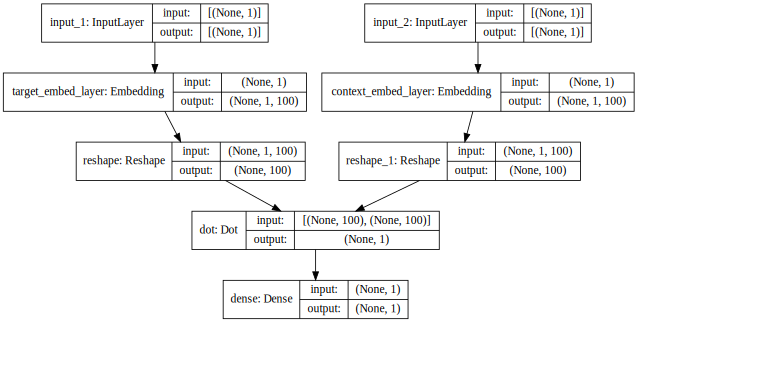

In [20]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))  


###**6.Training the Model**

In [21]:
import numpy as np

NUM_EPOCHS = 5

for epoch in range(1, NUM_EPOCHS+1):
    epoch_loss = 0
    for i, sent_examples in enumerate(skip_grams):
        target_wds = np.array([pair[0] for pair in sent_examples[0]], dtype='int32')
        context_wds = np.array([pair[1] for pair in sent_examples[0]], dtype='int32')
        labels = np.array(sent_examples[1], dtype='int32')
        X = [target_wds, context_wds]
        Y = labels
        if i % 5000 == 0: 
        	print('Processed %d sentences' %i)
        epoch_loss += model.train_on_batch(X, Y)
    print('Processed all %d sentences' %i)
    print('Epoch:', epoch, 'Loss:', epoch_loss, '\n')



Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 13650 sentences
Epoch: 1 Loss: 2311.536465926096 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 13650 sentences
Epoch: 2 Loss: 1876.237628273666 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 13650 sentences
Epoch: 3 Loss: 1799.8804895980284 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 13650 sentences
Epoch: 4 Loss: 1769.3616108330898 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 13650 sentences
Epoch: 5 Loss: 1768.3224783160258 



In the introduction, we outlined two approaches to training using the skipgram architecture. In this tutorial, we implemented the negative sampling training approach. While waiting for the training to complete, read this article http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/. It contains the skipgram model with softmax training. 

After reading the article, answer the following questions: 

**Question 1:** 

What would the inputs and outputs to the model be?

**ANSWER:**
*	Input will be context and the target
*	Output will be the label
---------------
**Question 2:** 

How would you use the Keras framework to create this architecture?

**ANSWER:**
*	Keras is a simple library for constructing and compiling the Neural networks.
*	It is the high level framework
*	It is used for creating a neural layers (such as., input layer, hidden layers, dense layer etc) which is combined to build a model.
----------------
**Question 3:** 

What are the reasons this training approach is considered inefficient?

**ANSWER:**
*	Word sense is not observed separately.
*	All words are represented in a single vector.


###**7. Getting the Word Embeddings**



In [22]:
word_embeddings = model.get_layer('target_embed_layer').get_weights()[0] 

#should return (VOCAB_SIZE, EMBED_SIZE)
print(word_embeddings.shape)

(10180, 100)


In [29]:
from pandas import DataFrame

print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                   0         1         2   ...        97        98        99
inference   -0.003513 -0.015825 -0.010127  ... -0.018737 -0.023041  0.002472
outweigh    -0.008032  0.028603 -0.004436  ... -0.028299 -0.003081 -0.019006
tray         0.001457 -0.018383 -0.002730  ... -0.010094 -0.008789 -0.008467
employments -0.010811 -0.007341 -0.036918  ... -0.003080  0.024970  0.019556
dove        -0.004949  0.016954  0.009763  ...  0.013511  0.029532  0.004282
smartened    0.017874  0.013559  0.000434  ...  0.008364  0.007070  0.000246
subsist      0.006971  0.031437 -0.030624  ... -0.024885  0.008564 -0.018796
warmed      -0.002066 -0.019759  0.013191  ...  0.003503 -0.000726  0.001290
periods      0.002030  0.012040  0.010387  ...  0.005154  0.016171 -0.011502
recommend    0.016469 -0.032057 -0.025717  ... -0.008441  0.001191 -0.010599

[10 rows x 100 columns]


###**8.  Measuring Similarity Between Word Pairs**



In [30]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(word_embeddings)

# should print(VOCAB_SIZE, VOCAB_SIZE)
print(similarity_matrix.shape)   

(10180, 10180)


###**9. Exploring and Visualizing your Word Embeddings using t-SNE**

**A.	Get the most similar words to the search items in the list below**

search_terms = ['family', 'love', 'equality', 'wisdom', 'justice',  'humour', 'rejection']


**Sanity check:**

In [32]:
search_terms = ['family', 'love', 'equality', 'wisdom', 'justice', 'humour', 'rejection']

# write code to get the 5 words most similar to the words in search_terms
similar_words = {term: [idx2word[idx] for idx in (-1 * similarity_matrix[word2idx[term]-1]).argsort()[1:6] + 1] for term in search_terms}

print(similar_words)

{'family': ['nephew', 'talents', 'forgave', 'submissively', 'kicked'], 'love': ['writing', 'laundry', 'several', 'excite', 'congratulations'], 'equality': ['short', 'lot', 'conducted', 'worded', 'excepted'], 'wisdom': ['anticipate', 'crossness', 'worded', 'topic', 'heedless'], 'justice': ['addition', 'auspices', 'signify', 'kingham', 'stupidest'], 'humour': ['hilarity', 'dissimilar', 'ablest', 'random', 'sweetbread'], 'rejection': ['roads', 'topic', 'betweens', 'unsullied', 'conferred']}


**B. Plot the words in the dictionary above using t-SNE**

Plot 50 of the word embeddings using the code snippets below:













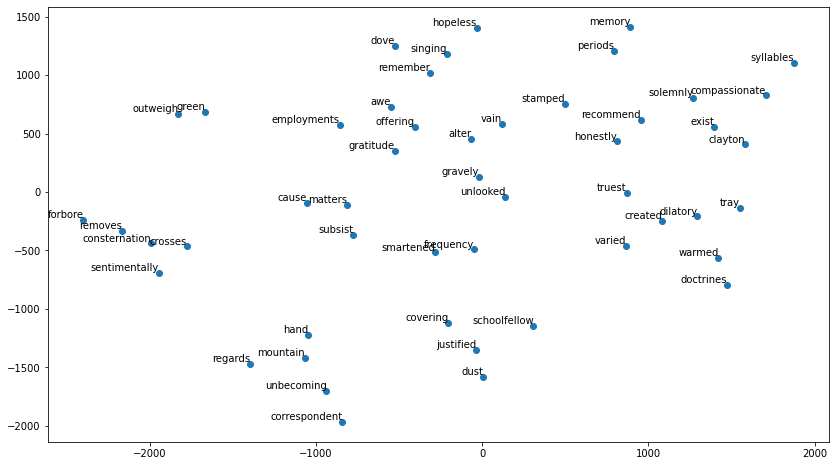

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50 

T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')                      	                        

